## Import necessary Libraries

In [4]:
!pip install catboost

In [5]:
import numpy as np
import pandas as pd
import os
#import tensorflow as tf
from catboost import CatBoostClassifier
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Load data

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [8]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_labels = train.pop("label")

In [10]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


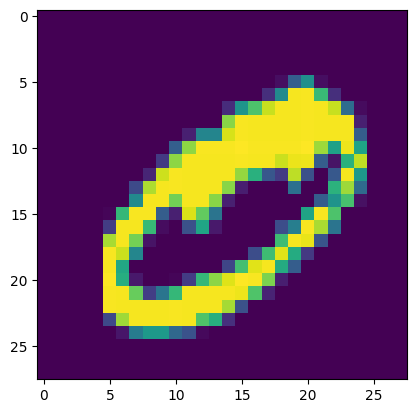

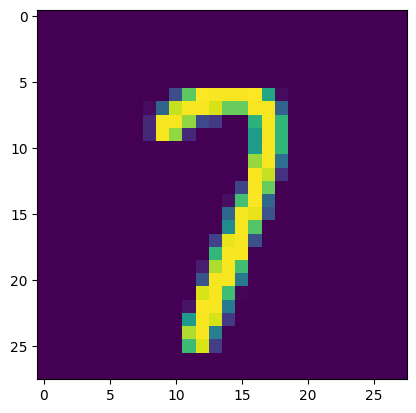

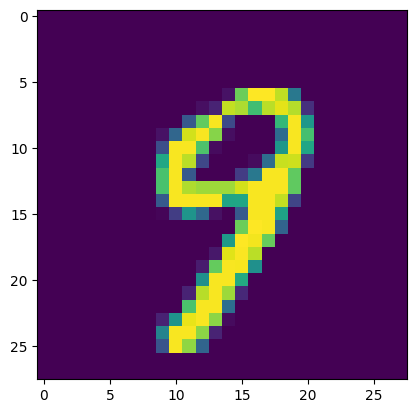

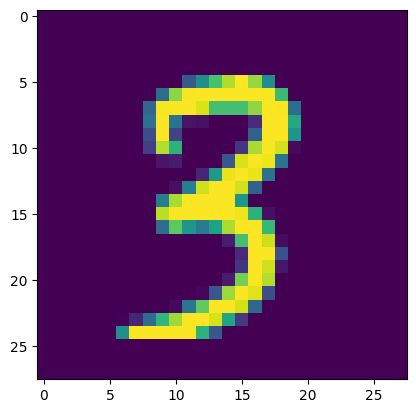

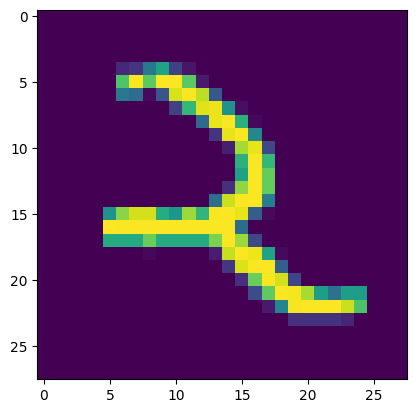

In [11]:
for i in range(5):
    plt.imshow(np.array(train.iloc[np.random.randint(train.shape[0])]).reshape(28, 28))
    plt.show()

## Validation Split

In [12]:
train_features, valid_features, train_targets, valid_targets = train_test_split(train, train_labels, test_size=0.2)
train_features.shape, train_targets.shape, valid_features.shape, valid_targets.shape

((33600, 784), (33600,), (8400, 784), (8400,))

## Model Development

In [13]:
cat_params = {
    'iterations': 10000, 
    'depth': 6, 
    'task_type' : 'GPU',
    'use_best_model': True,
    'early_stopping_rounds': 500,
    'learning_rate': 0.03,
    "verbose": 500
}
cat = CatBoostClassifier(
    **cat_params
)
cat.fit(train_features, train_targets, eval_set=[(valid_features, valid_targets)])

0:	learn: 2.2037774	test: 2.2011961	best: 2.2011961 (0)	total: 141ms	remaining: 23m 27s
500:	learn: 0.1418370	test: 0.1662779	best: 0.1662779 (500)	total: 51.6s	remaining: 16m 18s
1000:	learn: 0.1075354	test: 0.1380668	best: 0.1380668 (1000)	total: 1m 30s	remaining: 13m 32s
1500:	learn: 0.0871006	test: 0.1225490	best: 0.1225490 (1500)	total: 2m 9s	remaining: 12m 13s
2000:	learn: 0.0745232	test: 0.1135557	best: 0.1135557 (2000)	total: 2m 47s	remaining: 11m 11s
2500:	learn: 0.0642359	test: 0.1068046	best: 0.1068046 (2500)	total: 3m 26s	remaining: 10m 19s
3000:	learn: 0.0560336	test: 0.1013437	best: 0.1013437 (3000)	total: 4m 6s	remaining: 9m 34s
3500:	learn: 0.0488786	test: 0.0966454	best: 0.0966454 (3500)	total: 4m 45s	remaining: 8m 50s
4000:	learn: 0.0426519	test: 0.0926534	best: 0.0926534 (4000)	total: 5m 25s	remaining: 8m 7s
4500:	learn: 0.0373938	test: 0.0894667	best: 0.0894667 (4500)	total: 6m 6s	remaining: 7m 27s
5000:	learn: 0.0327194	test: 0.0867156	best: 0.0867156 (5000)	total:

## Model Evaluation

In [14]:
def evaluate(y_true, y_pred):
    print(y_true.shape, y_pred.shape)
    acc = sklearn.metrics.accuracy_score(y_true, y_pred)
    print("Accuracy score: %.2f"%(acc))
    print("Classification report:")
    print(sklearn.metrics.classification_report(y_true, y_pred))

In [15]:
evaluate(valid_targets, cat.predict(valid_features).reshape(-1))

(8400,) (8400,)
Accuracy score: 0.98
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       836
           1       0.99      0.98      0.99       950
           2       0.97      0.98      0.97       799
           3       0.97      0.97      0.97       873
           4       0.97      0.98      0.98       789
           5       0.98      0.97      0.97       766
           6       0.98      0.98      0.98       806
           7       0.98      0.98      0.98       926
           8       0.98      0.97      0.97       831
           9       0.98      0.97      0.97       824

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



## Submission

In [16]:
test_labels = cat.predict(test)
image_ids = np.arange(1, test_labels.shape[0]+1)
result = np.concatenate((image_ids.reshape(image_ids.shape[0], 1), test_labels.reshape(test_labels.shape[0], 1)), axis=1)
df = pd.DataFrame(result, columns=["ImageId", "Label"], dtype='int')
df.to_csv("submission.csv", index=False)